<a href="https://colab.research.google.com/github/tanvi1911/Anime_Recommendation_System/blob/main/FINAL_BI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANIME RECOMMENDATION SYSTEM

In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3097777 sha256=cdf8bb7c8320c01006a17658879121e87701bff861dfaaebdceafa50d318f066
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import re
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import string
import nltk
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Load the anime dataset
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [5]:
print(f"Shape of The Anime Dataset : {anime.shape}")
print(f"\nGlimpse of The Dataset :")
anime.head()

Shape of The Anime Dataset : (12294, 7)

Glimpse of The Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [7]:
print(f"Shape of The Rating Dataset : {rating.shape}")
print(f"\nGlimpse of The Dataset :")
rating.head()

Shape of The Rating Dataset : (161719, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20.0,-1.0
1,1,24.0,-1.0
2,1,79.0,-1.0
3,1,226.0,-1.0
4,1,241.0,-1.0


In [8]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161719 entries, 0 to 161718
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   161719 non-null  int64  
 1   anime_id  161718 non-null  float64
 2   rating    161718 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.7 MB
None


In [9]:
print(f"Summary of The Anime Dataset :")
anime.describe()

Summary of The Anime Dataset :


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [10]:
anime.describe(include=object).T

,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [11]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame().T

Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [12]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame().T

After Dropping, Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [13]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


In [14]:
print(f"Summary of The Rating Dataset :")
rating.describe().T

Summary of The Rating Dataset :


,count,mean,std,min,25%,50%,75%,max
user_id,161719.0,832.141999,459.950251,1.0,439.0,823.0,1224.0,1602.0
anime_id,161718.0,11161.845979,9201.535196,1.0,2787.0,9936.0,17265.0,34240.0
rating,161718.0,6.055114,3.834493,-1.0,5.0,7.0,9.0,10.0


In [15]:
# Calculating null values
print("Null Values of Rating Dataset :")
rating.isna().sum().to_frame().T

Null Values of Rating Dataset :


,user_id,anime_id,rating
0,0,1,1


In [16]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 0 duplicate entries among 161719 entries in rating dataset.

After removing duplicate entries there are 161719 entries in this dataset.


In [17]:
# Merging the datasets
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head()

Shape of The Merged Dataset : (161714, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0


### Custom Palette For Visualization

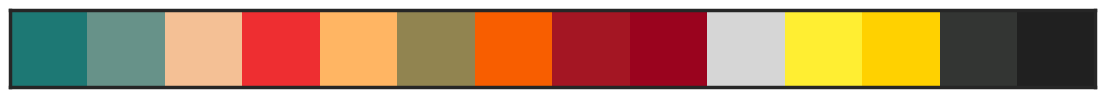

In [18]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

### Top Anime Community

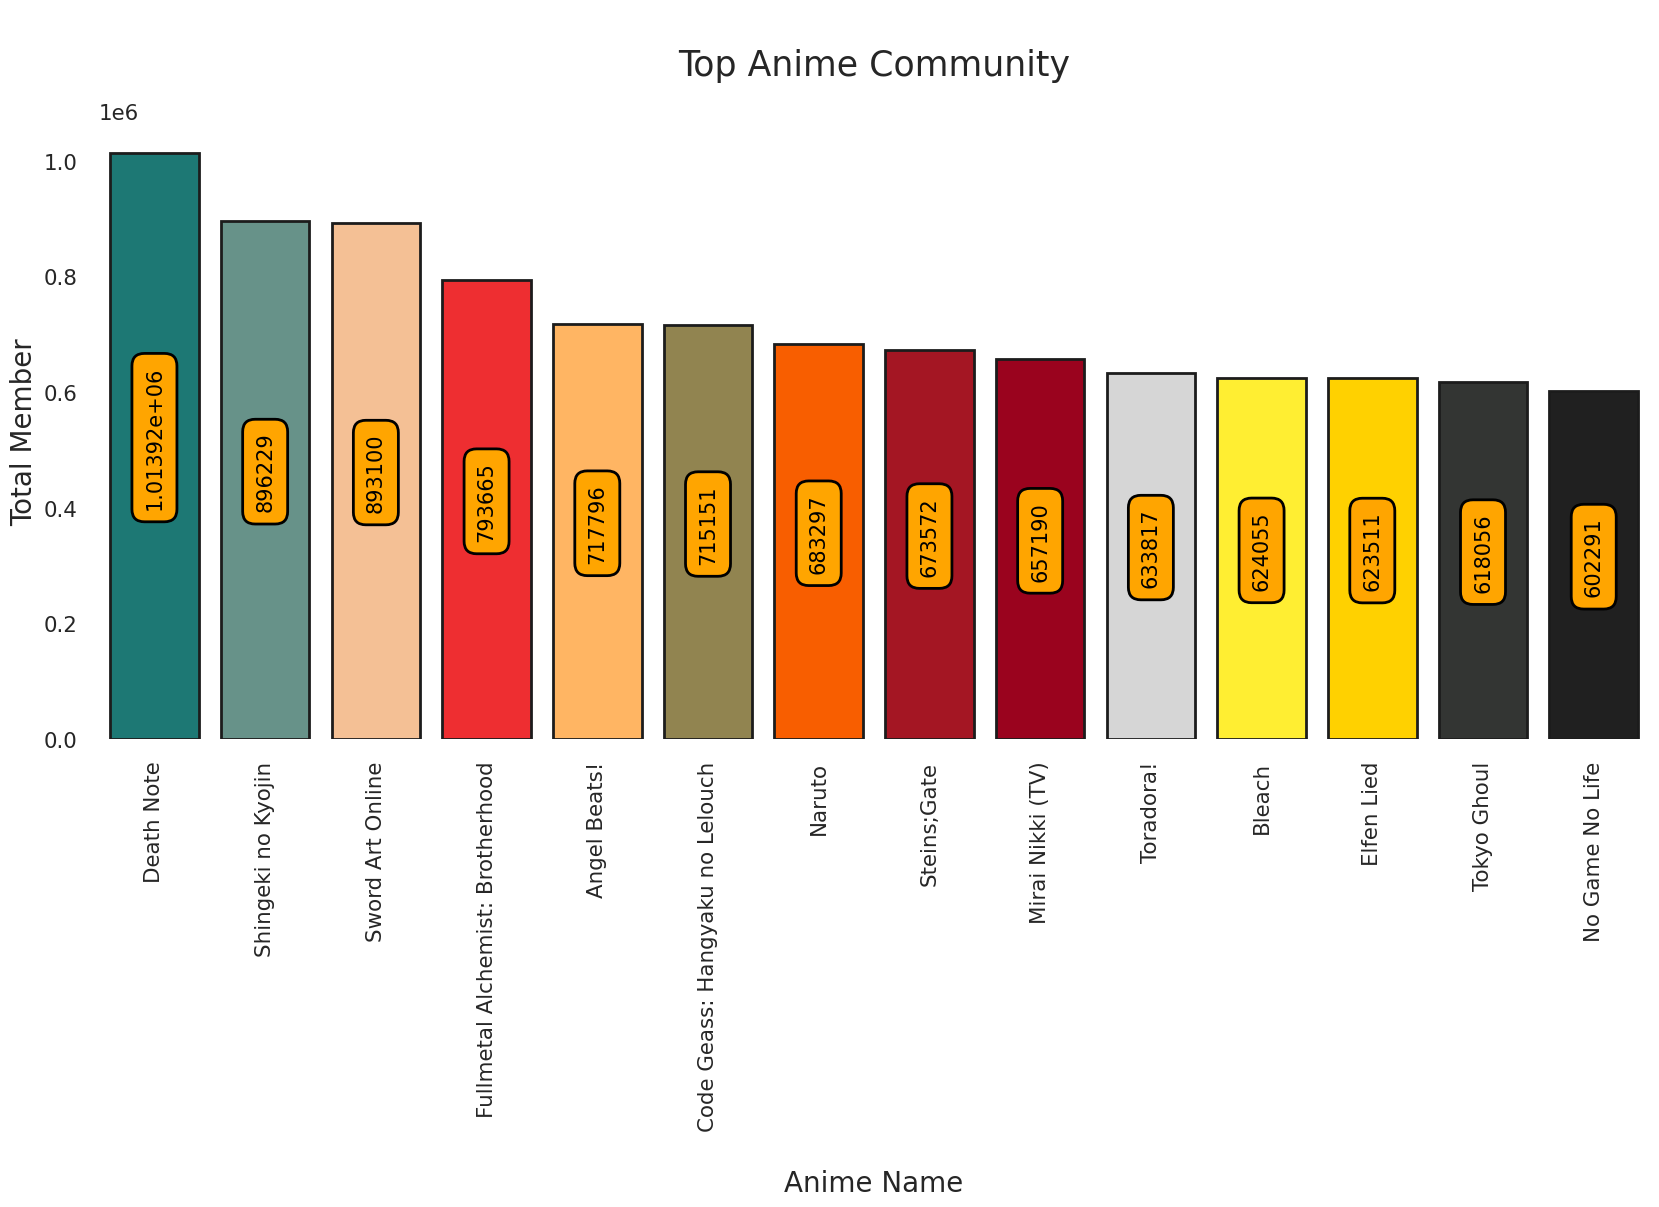

In [19]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:14],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Death Note** wears the crown for highest community members followed by **Shingeki no Kyojin** and **Sword Art Online**

## Anime Category

In [20]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame().T

Anime Categories :


,TV,OVA,Special,Movie,ONA,Music
type,2249,1468,944,814,194,84


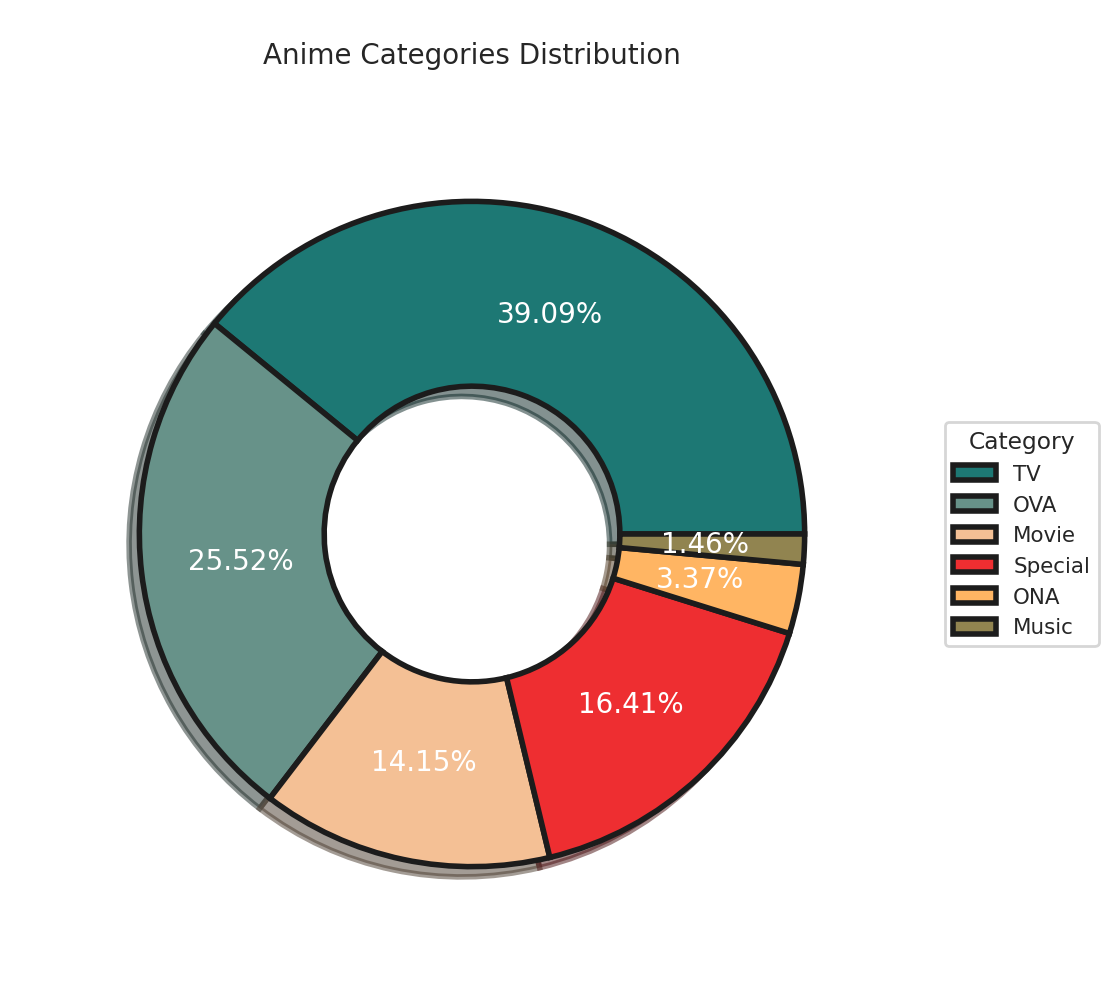

In [21]:
plt.subplots(figsize=(12, 12))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = palette,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c",
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

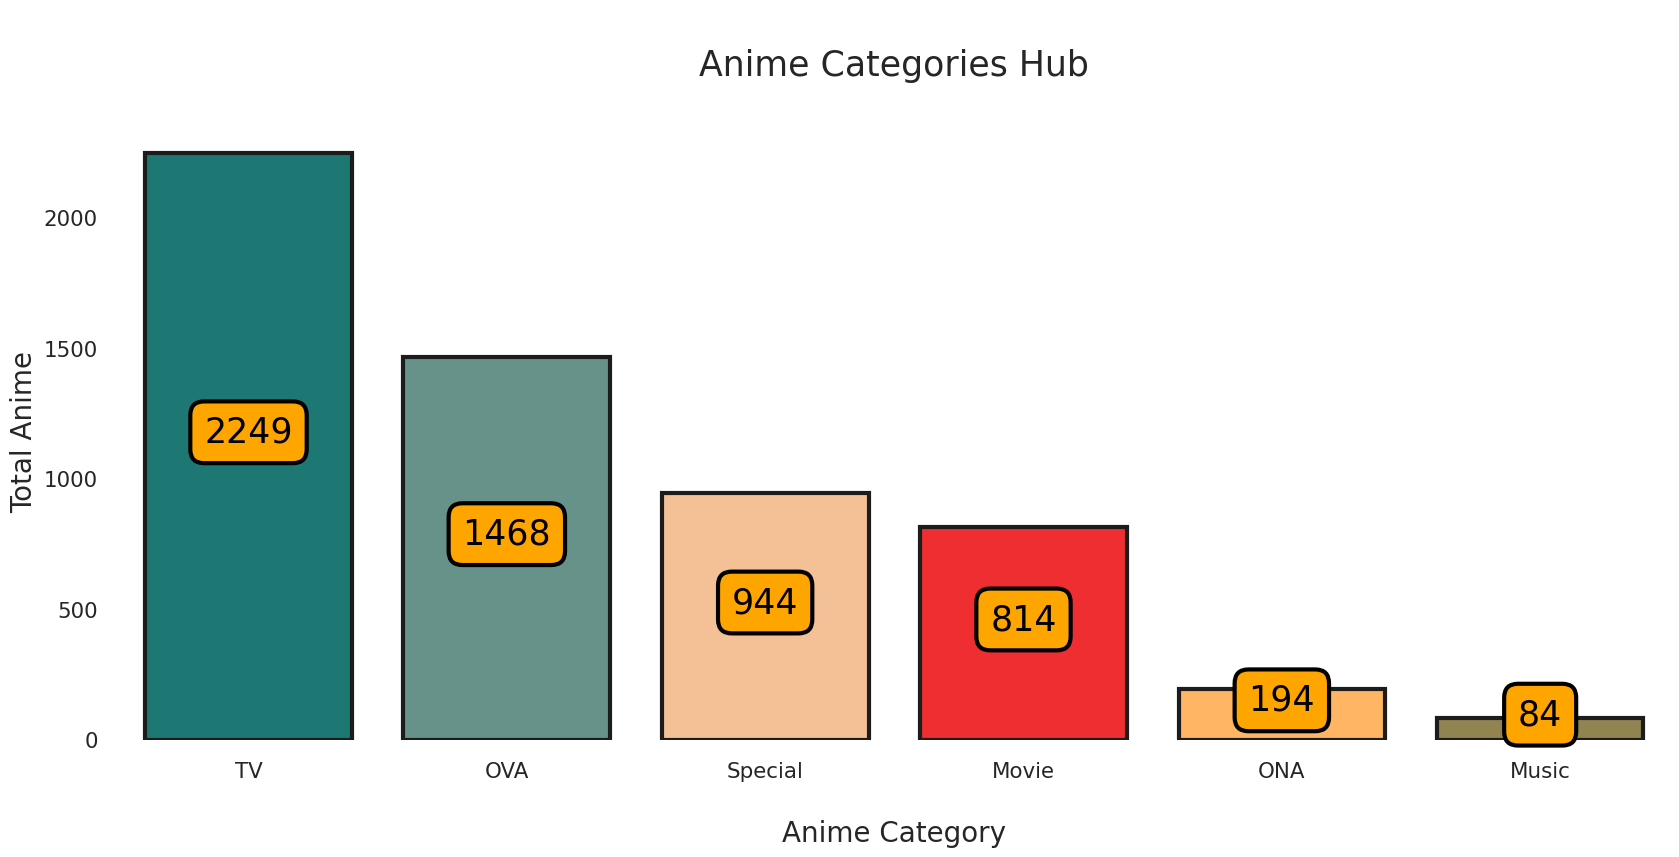

In [22]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

**Insights:**

* 3402 animes are aired on TV which is 30.48% of total animes
* 2111 animes are streamed as Movie which is 18.91% of total animes
* 3090 animes are streamed as OVA which is 27.69% of total animes also greater than ONA which includes 526 animes that is 4.71% of total animes.

## Overall Anime Ratings

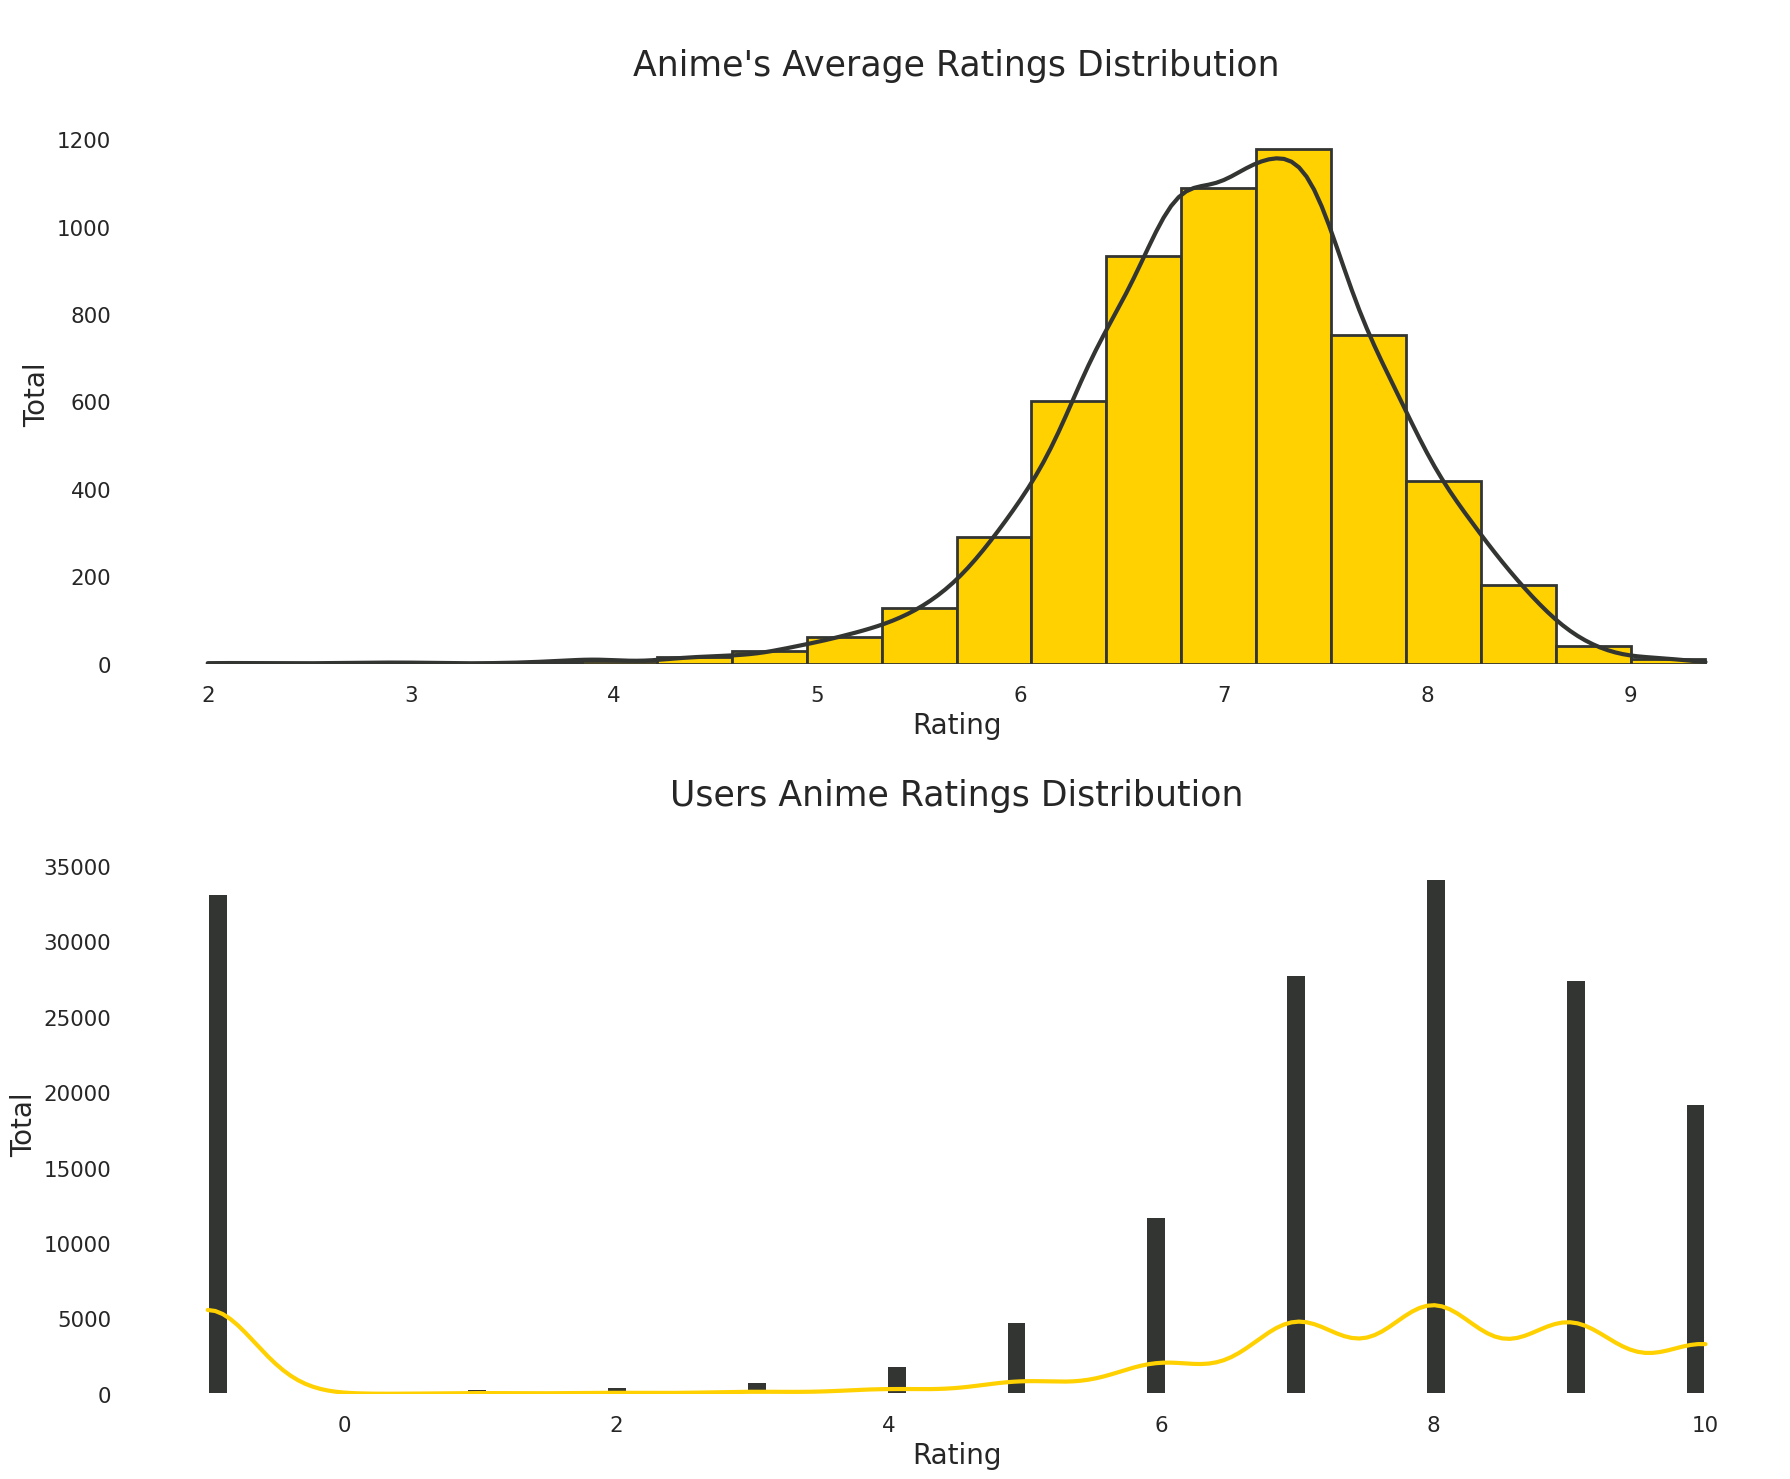

In [23]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(fulldata["user_rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 5.5 - 8.0
* Most of the users ratings are spread between 6.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

## Top Animes Based On Ratings

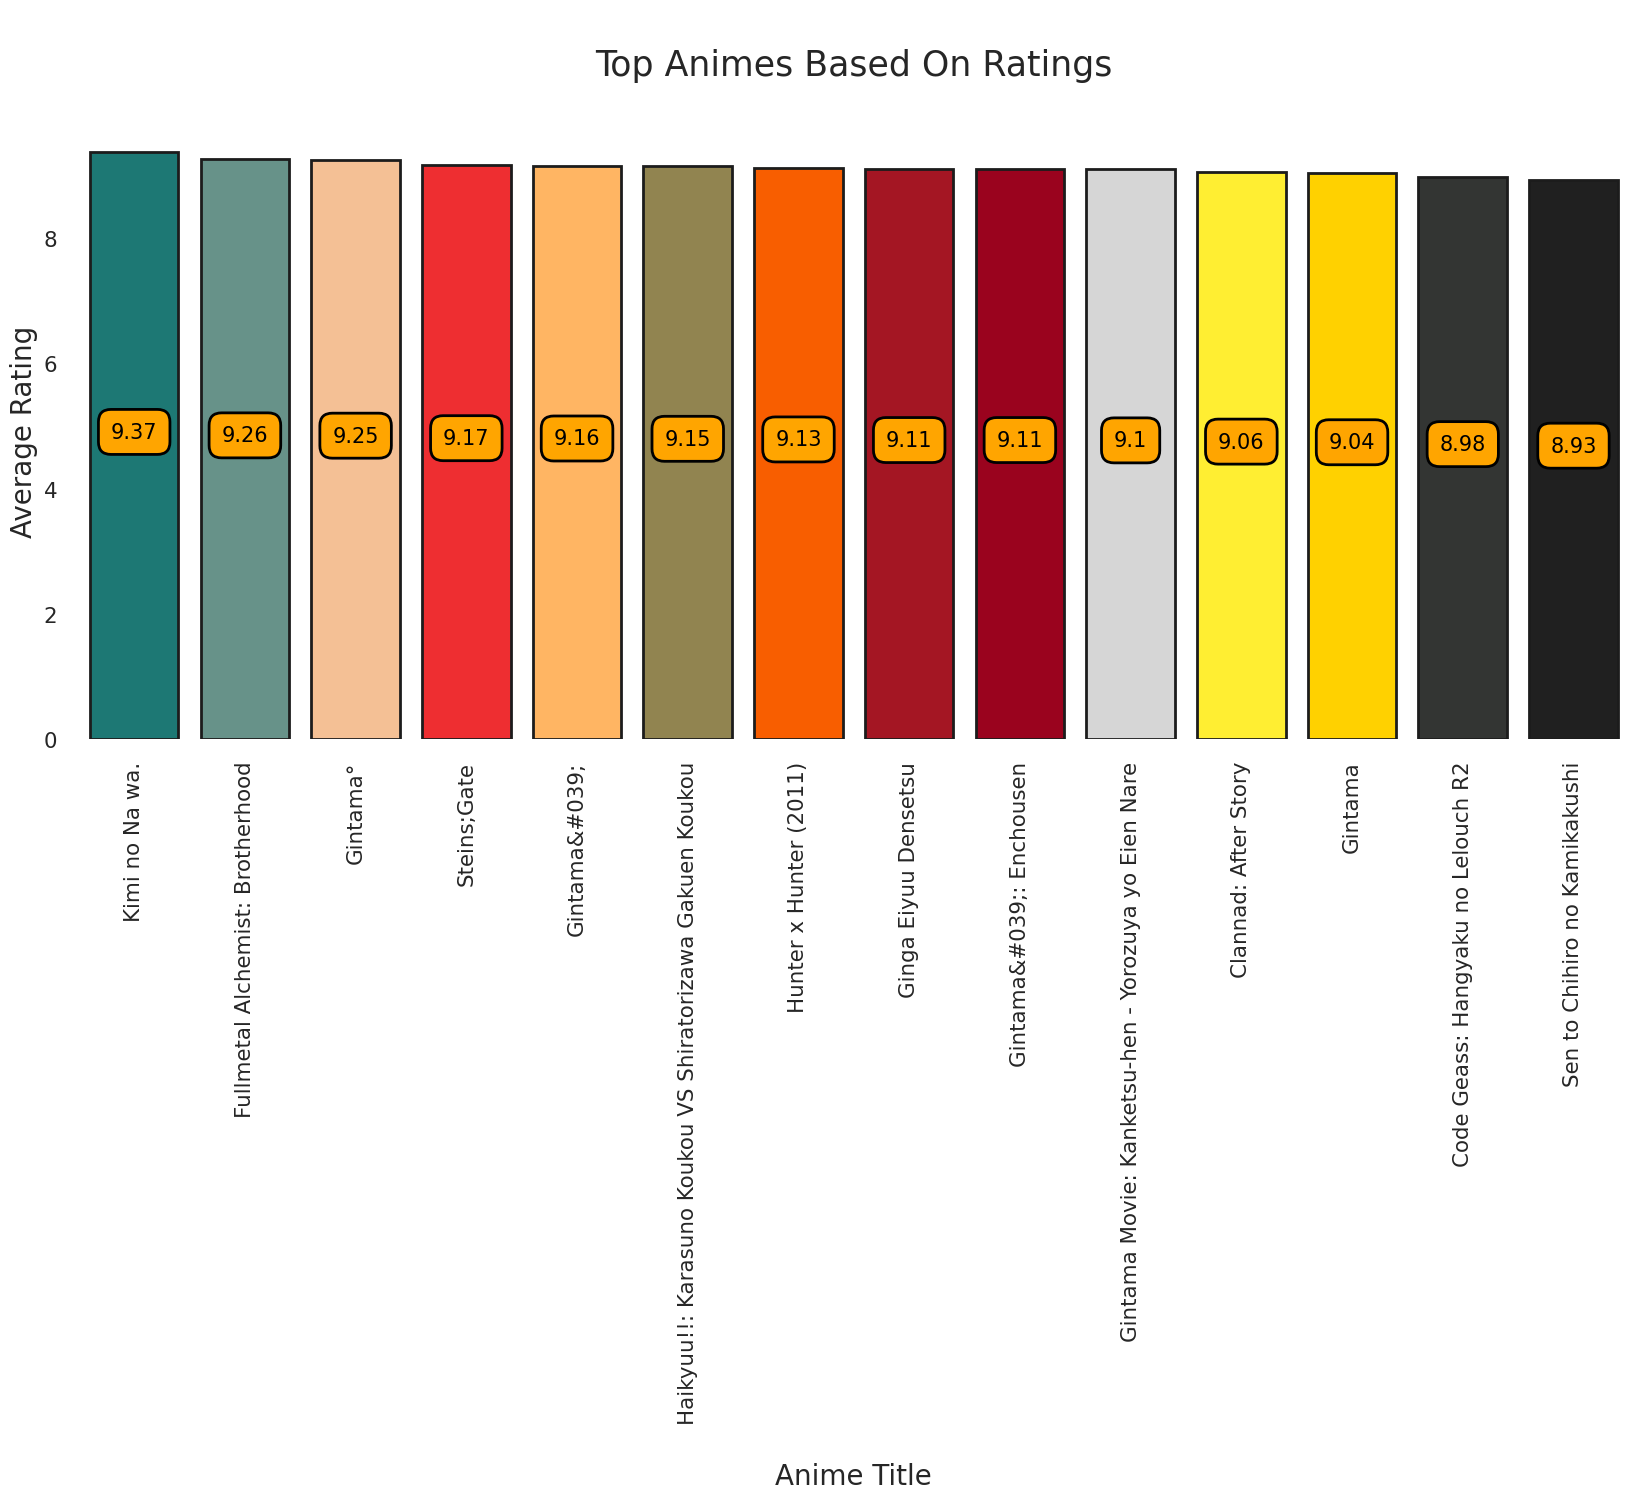

In [24]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")a
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Mogura no Motoro** wears the crown for highest rating followed by **Kimi no Na wa.** and **Fullmetal Alchemist: Brotherhood**

## Category-wise Anime Ratings Distribution

Let's explore the ratings distribution of TV category :



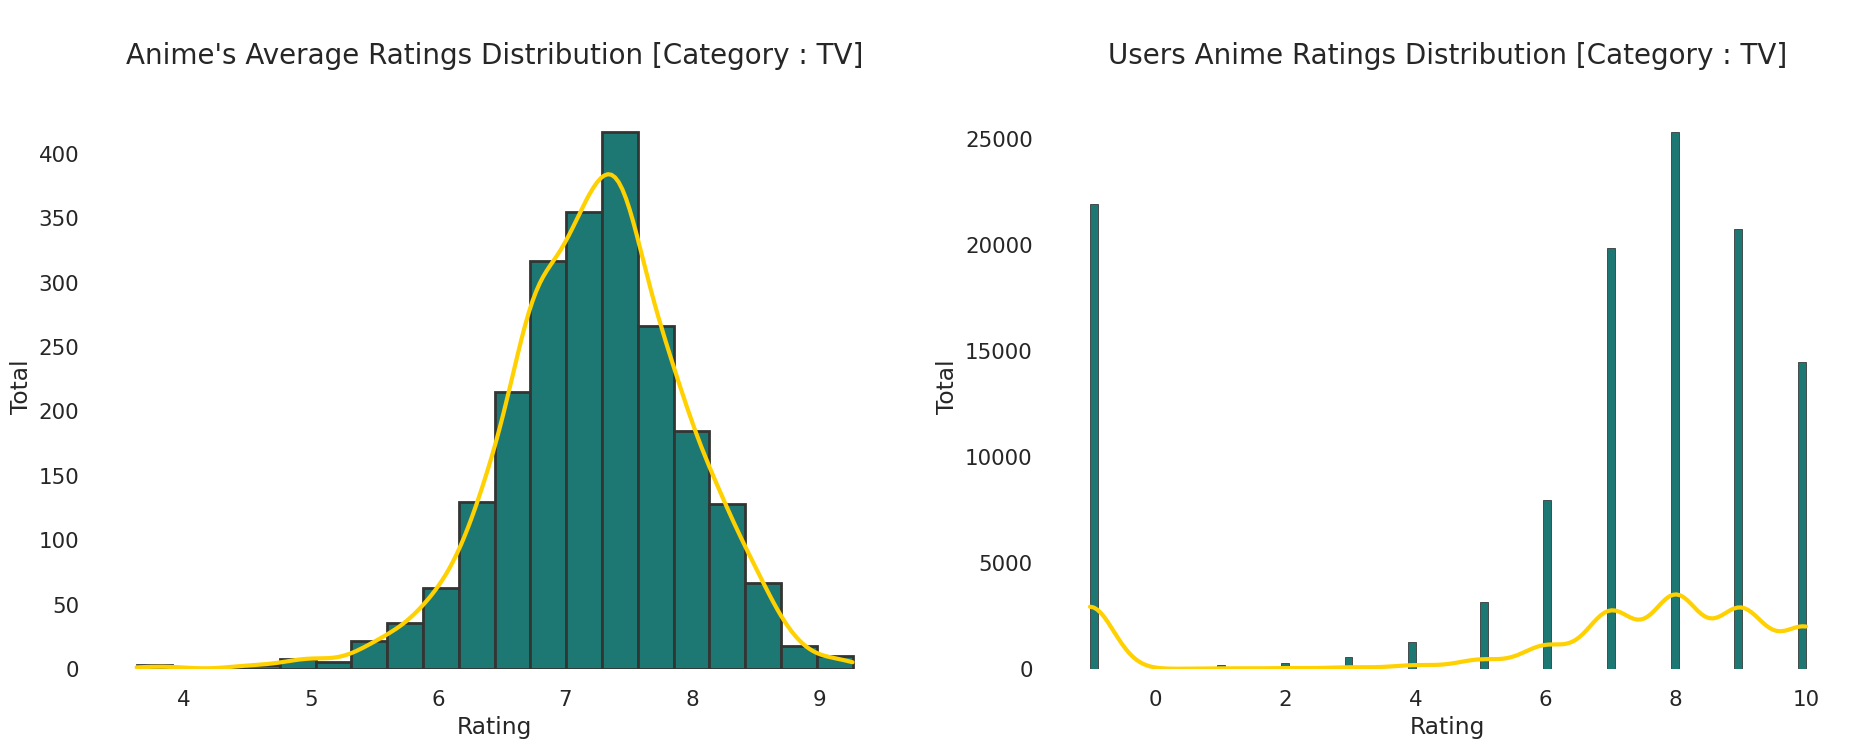

In [25]:
print("Let's explore the ratings distribution of TV category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 6.0 - 8.0
* Most of the users ratings are spread between 6.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 9.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of OVA category :



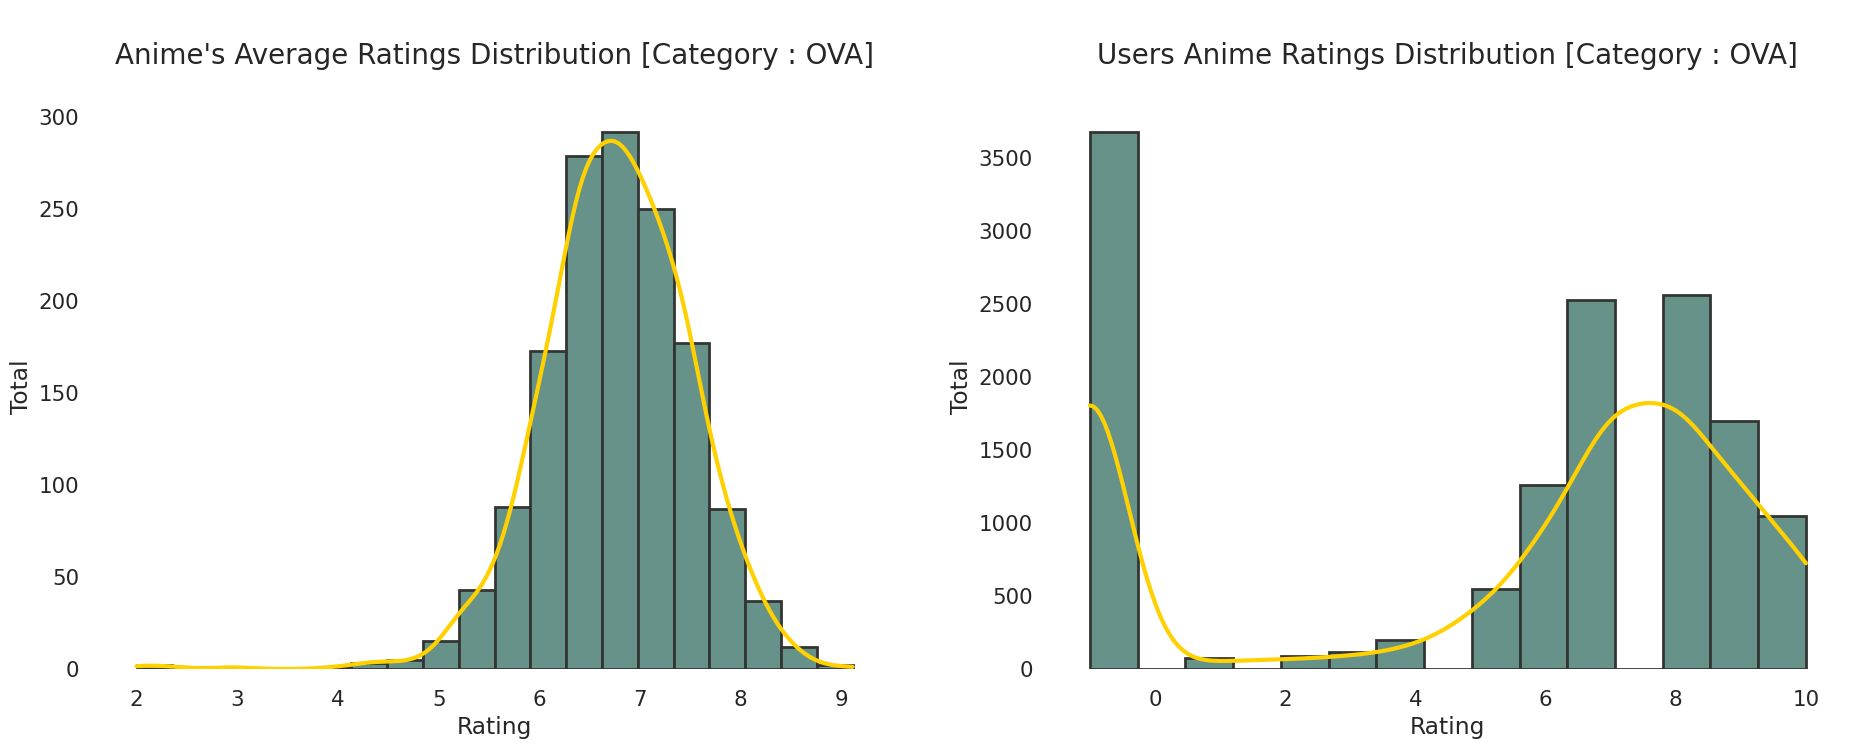

In [26]:
print("Let's explore the ratings distribution of OVA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 5.5 - 7.5
* Most of the users ratings are spread between 5.5 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of MOVIE category :



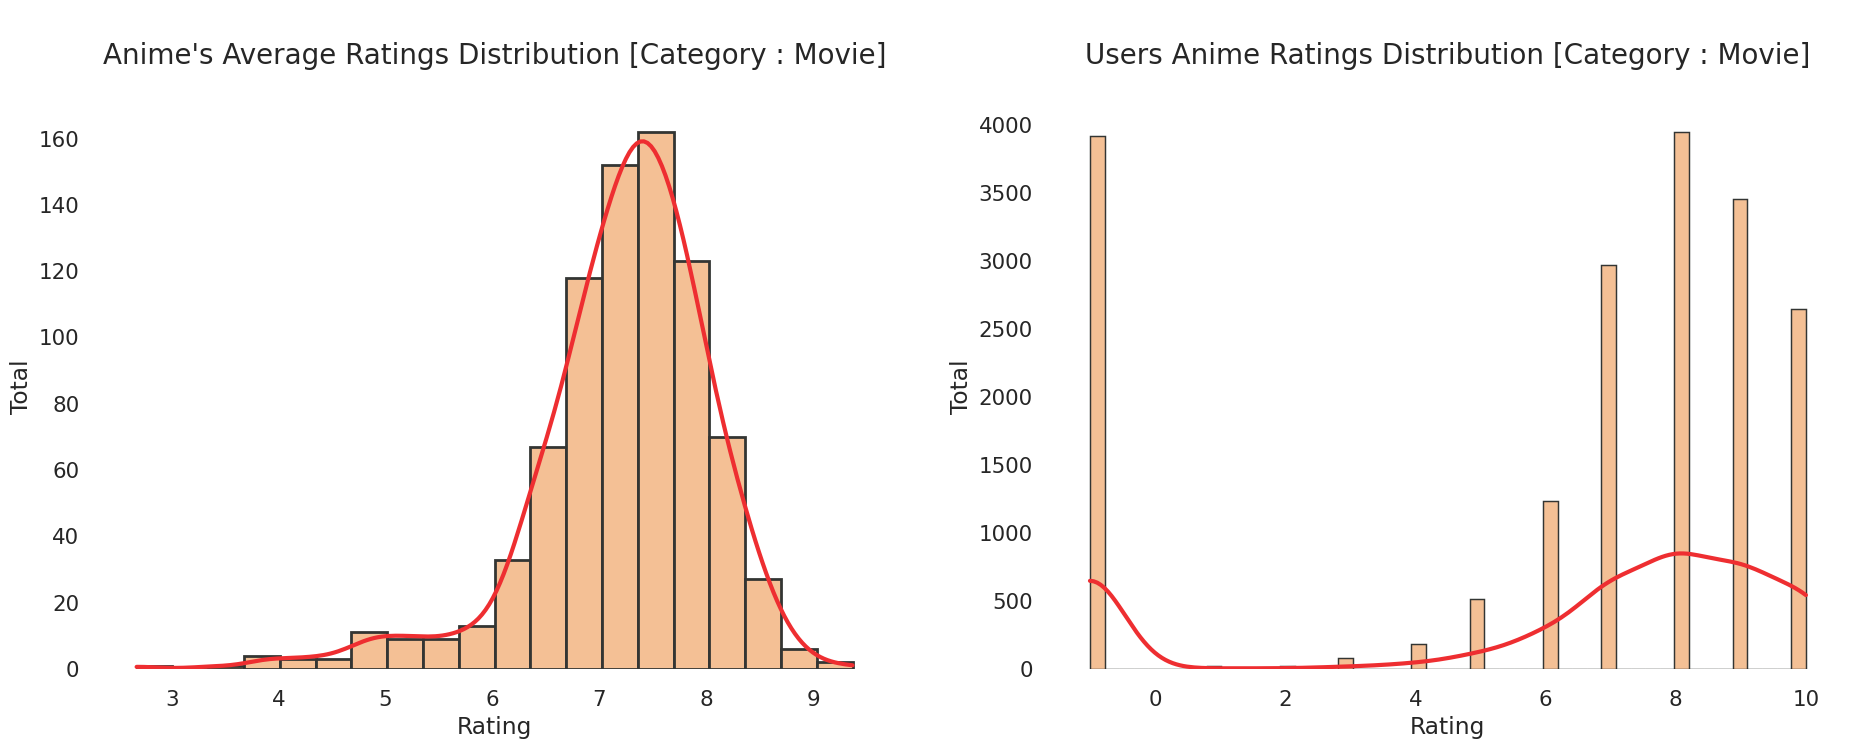

In [27]:
print("Let's explore the ratings distribution of MOVIE category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Movie"]["rating"],color=palette[2],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Movie"]["user_rating"],color=palette[2],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 4.5 - 8.5
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 9.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of SPECIAL category :



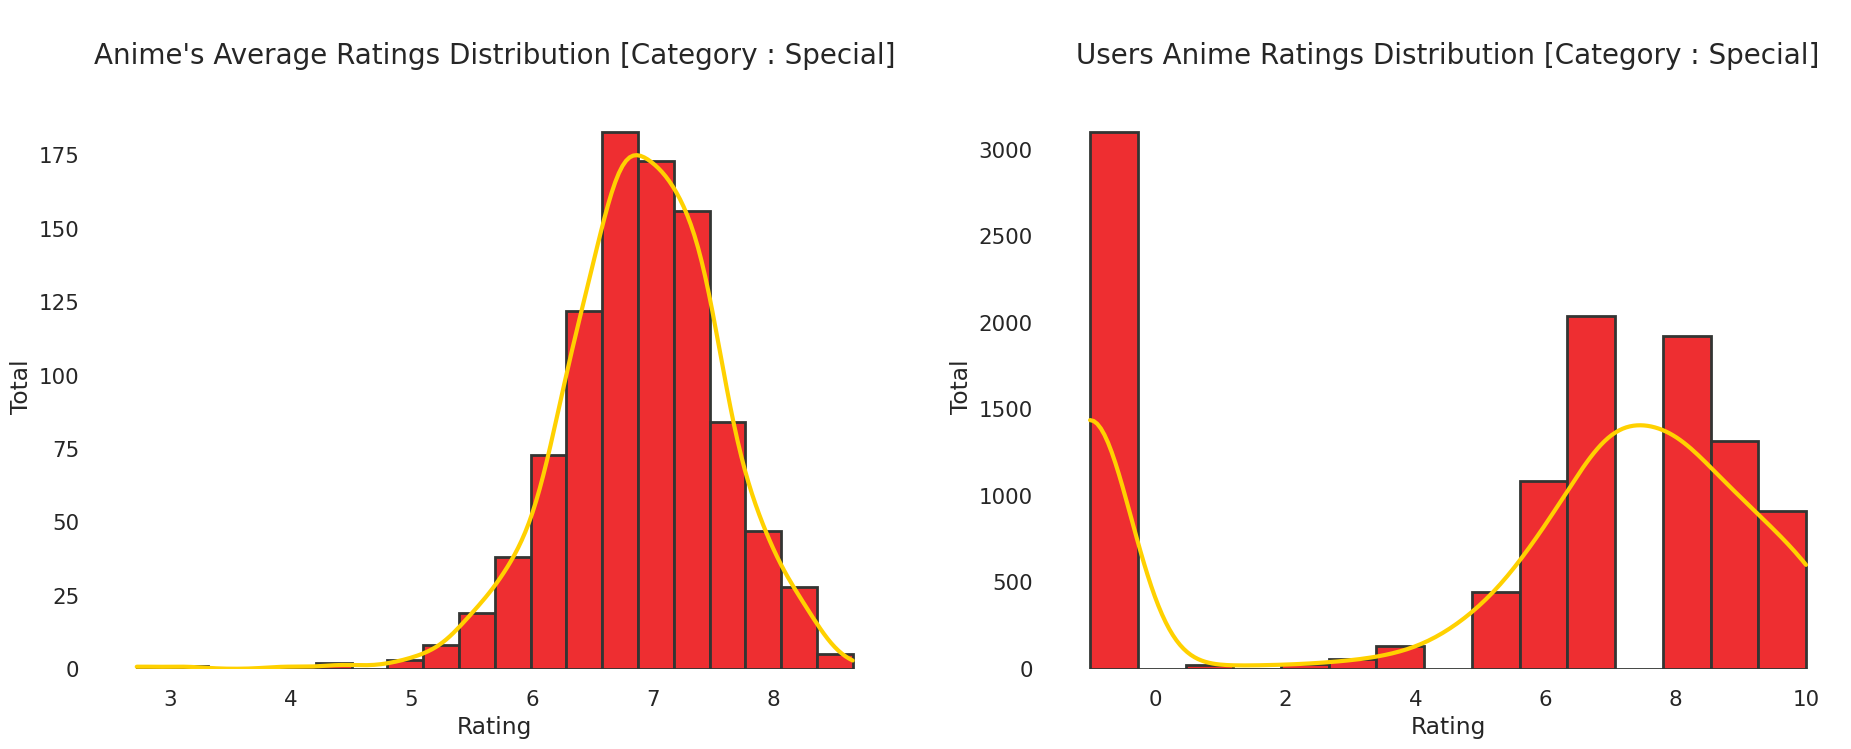

In [28]:
print("Let's explore the ratings distribution of SPECIAL category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Special"]["rating"],color=palette[3],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Special"]["user_rating"],color=palette[3],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 5.5 - 8.0
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of ONA category :



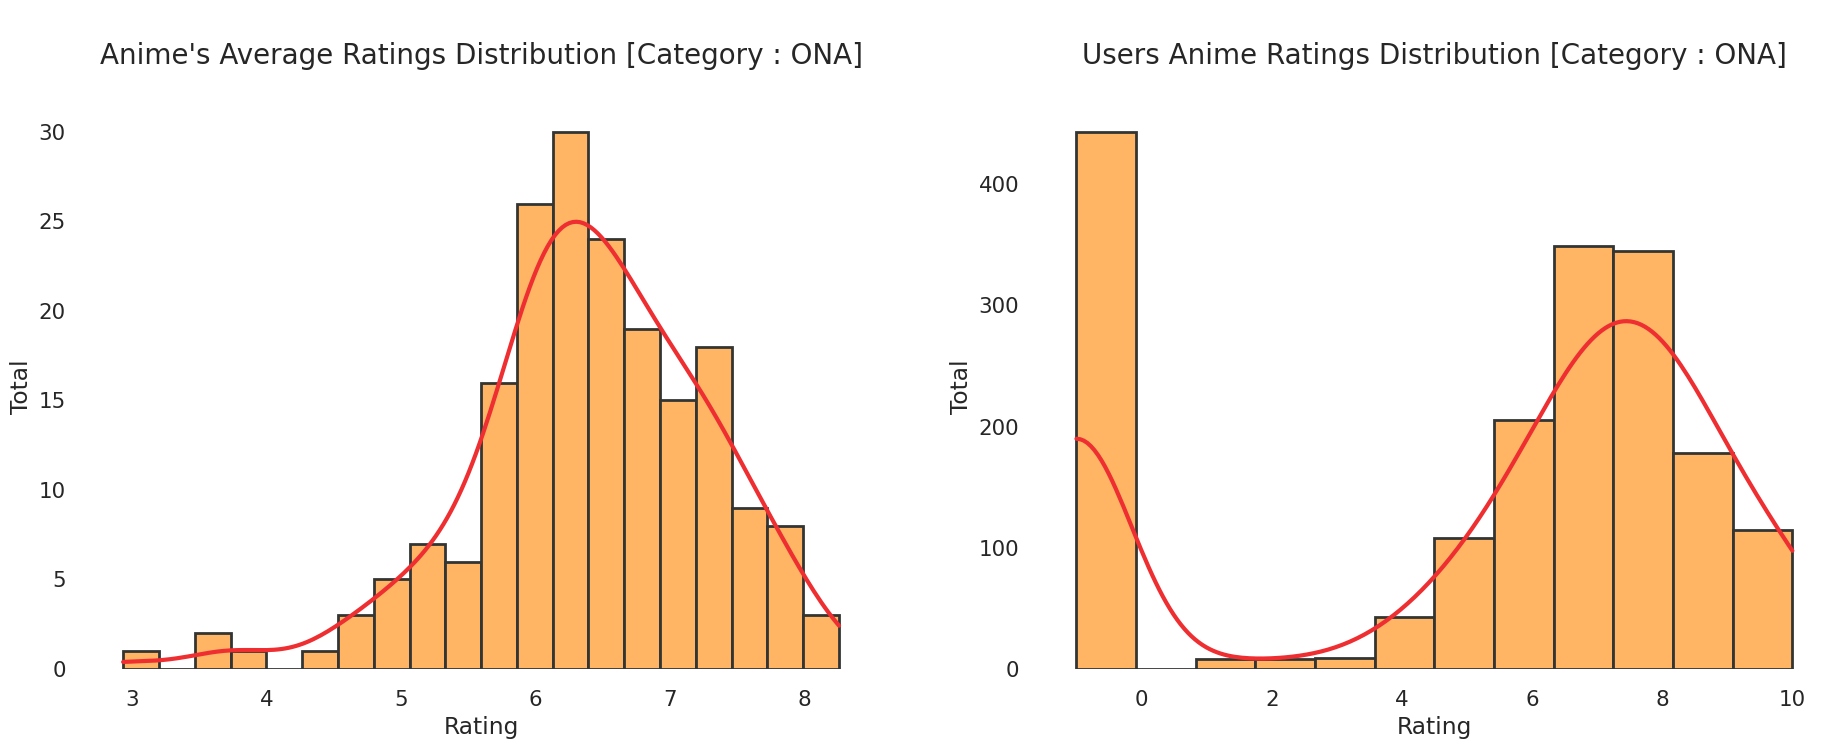

In [29]:
print("Let's explore the ratings distribution of ONA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="ONA"]["rating"],color=palette[4],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="ONA"]["user_rating"],color=palette[4],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 4.0 - 7.0
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of MUSIC category :



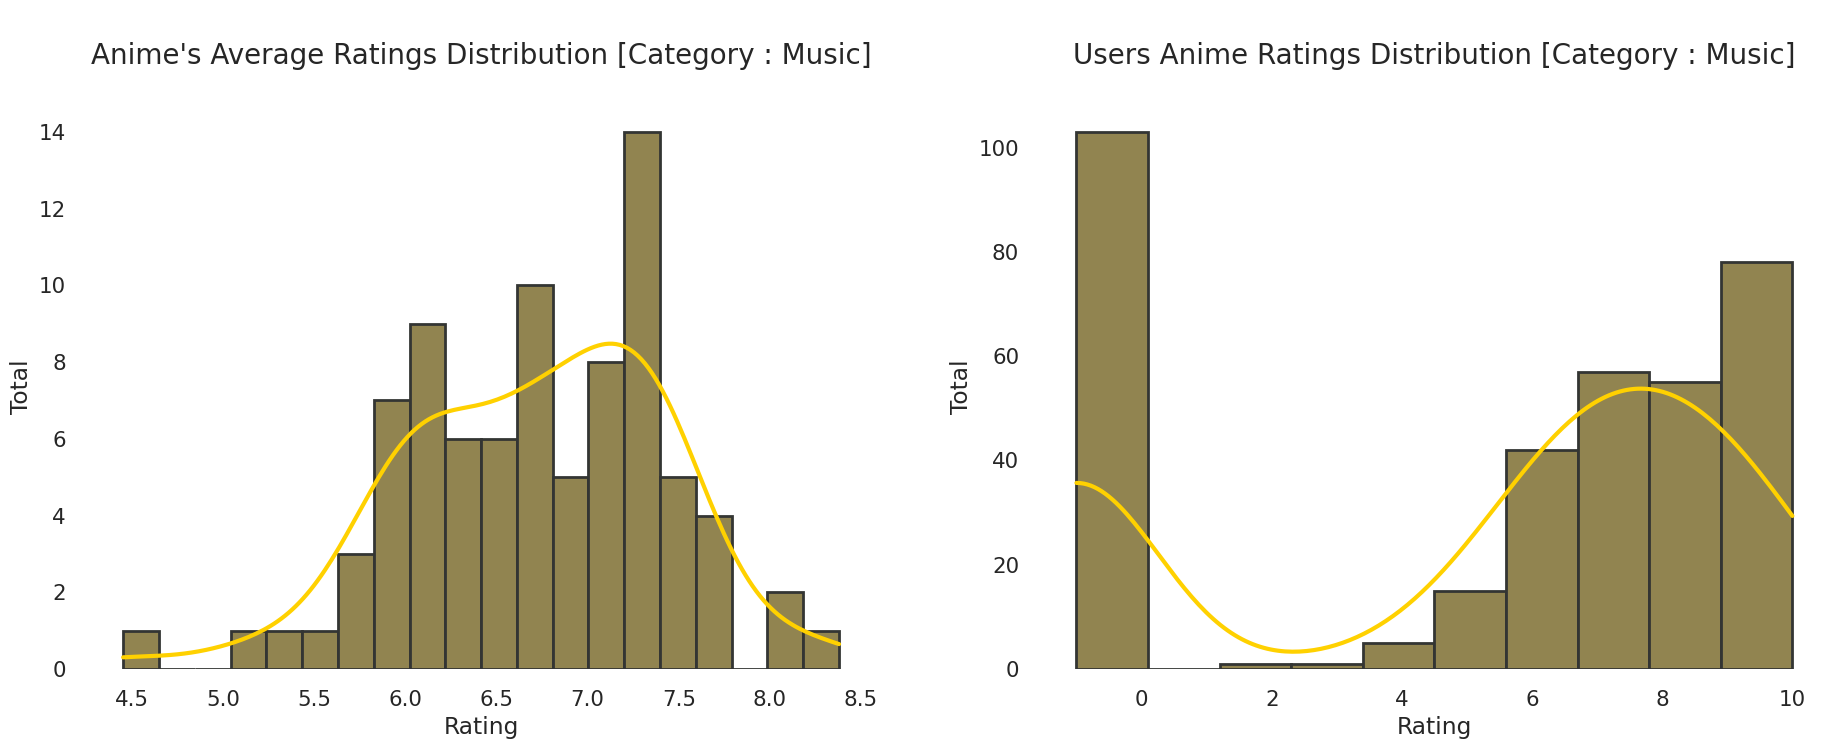

In [30]:
print("Let's explore the ratings distribution of MUSIC category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_temp2[top_anime_temp2["type"]=="Music"]["rating"],color=palette[5],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Music"]["user_rating"],color=palette[5],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 4.0 - 7.5
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 6.5 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

##Linear Regression

In [31]:
# Prepare the data for linear regression
X = anime[['members']]
y = anime['rating']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
y_train.isna().sum()


0

In [34]:
y_train.shape


(9613,)

In [35]:
y_train.head()


909     7.77
7480    5.38
496     8.03
9204    5.83
6846    5.90
Name: rating, dtype: float64

In [36]:
y_train.fillna(y_train.mean(), inplace=True)


In [37]:
# Create a linear regression model and fit it to the training data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Get recommendations for top 5 movies based on members count
top_anime = anime.sort_values(by='members', ascending=False)[:5]
X_top_anime = top_anime[['members']]
recommendations = reg_model.predict(X_top_anime)
top_anime['predicted_rating'] = recommendations
print(top_anime[['name', 'members', 'predicted_rating']])


                                 name  members  predicted_rating
40                         Death Note  1013917         13.574956
86                 Shingeki no Kyojin   896229         12.735389
804                  Sword Art Online   893100         12.713068
1    Fullmetal Alchemist: Brotherhood   793665         12.003715
159                      Angel Beats!   717796         11.462478


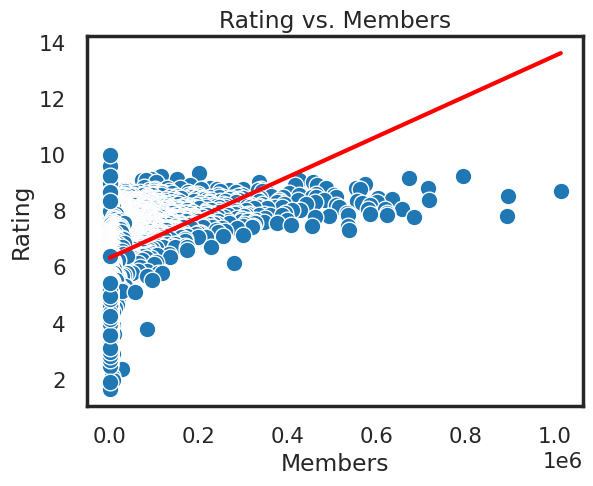

In [39]:
# Create a scatter plot of rating vs. member
sns.scatterplot(x='members', y='rating', data=anime)
# Fit a linear regression model to the data
X = anime[['members']]
y = anime['rating']
model = LinearRegression().fit(X, y)
# Add the regression line to the plot
sns.lineplot(x=X['members'], y=model.predict(X), color='red')
# Set the plot title and axis labels
plt.title('Rating vs. Members')
plt.xlabel('Members')
plt.ylabel('Rating')
# Display the plot
plt.show()

In [40]:
# Evaluate the model on the testing data
lreg_score = reg_model.score(X_test, y_test)
print(f"Accuracy: {lreg_score}")

Accuracy: 0.15779120062202256


# Collaborative Filtering

In [41]:
collab_data = fulldata.copy()
collab_data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
collab_data = collab_data.dropna(axis = 0)
print("Null values after final pre-processing :")
collab_data.isna().sum().to_frame().T

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


There are a lot of users who have rated only once, even if they have rated 5 animes, it can't be considered as a valuable record for recommendation. So we will consider minimum 50 ratings by the user as a threshold value.

In [43]:
selected_users = collab_data["user_id"].value_counts()
collab_data = collab_data[collab_data["user_id"].isin(selected_users[selected_users >= 50].index)]

We will create a pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity.

In [44]:
data_pivot_temp = collab_data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,1589,1590,1591,1592,1594,1595,1596,1600,1601,1602
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have got many japanese or special character symbols in anime name. Let's remove those using this function

In [45]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

collab_data["name"] = collab_data["name"].apply(text_cleaning)

In [46]:
data_pivot = collab_data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,1589,1590,1591,1592,1594,1595,1596,1600,1601,1602
name,,,,,,,,,,,,,,,,,,,,,
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-Ghost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11eyes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11eyes Picture Drama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Collaborative Recommender

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. We will use Cosine similarity which is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [47]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0]) # random anime title and finding recommendation
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 1775 no anime which is High School Fleet.


In [48]:
no = []
name = []
distance = []
rating = []

# for i in range(0, len(distances.flatten())):
#     if i == 0:
#         print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
#     else:
#         #  print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")
#         no.append(i)
#         name.append(data_pivot.index[indices.flatten()[i]])
#         distance.append(distances.flatten()[i])
#         rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

# dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
# recommendation = pd.DataFrame(data = dic)
# recommendation.set_index("No", inplace = True)
# recommendation.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [49]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_pivot.values, data_pivot.index, test_size=0.2, random_state=42)

In [50]:
# predict ratings for the testing set
y_pred = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        #  print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)
        y_pred.append(rating)


dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Recommendations for High School Fleet viewers :



,Anime Name,Rating
No,,
1,Sansha Sanyou,7.230000
2,New Game!,7.810000
3,Girls und Panzer der Film,8.550000
4,Love Live! The School Idol Movie,8.180000
5,Anne Happy♪,7.170000


In [51]:
from sklearn.metrics import mean_absolute_error


In [52]:
# # calculate the mean absolute error
# mae = mean_absolute_error(y_test, y_pred)
# print(f'MAE: {mae:.2f}')

## Content Based Recommender

Content based filtering recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated which is then used to make suggestions for the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

**Term Frequency(TF) & Inverse Document Frequency(IDF)**

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).
Here we are going to use it on the genre of animes so that we can recommend contents to the users based on genres.


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)


Also, scikit-learn already provides pairwise metrics (a.k.a. kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. Here we need to assign 1 for recommended anime and 0 for not recommended anime. We will use sigmoid kernel here.

In [54]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):

    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]

    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11),
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)

    print(f"Recommendations for {title} viewers :\n")

    return dataframe.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [55]:
give_recommendation("Naruto")

Recommendations for Naruto viewers :



,Anime Name,Rating
No,,
1,Sword Art Online,7.830000
2,Ushio to Tora (TV),7.710000
3,"Tokyo Ghoul: ""Pinto""",7.610000
4,Higashi no Eden: Falling Down,7.560000
5,Aoki Densetsu Shoot!,7.530000
6,Dog Days',7.320000
7,Mushibugyou OVA,7.200000
8,Dr. Slump Movie 07: Arale-chan N-cha! Penguin Mura yori Ai wo Komete,6.560000
9,Mobile Police Patlabor: On Television,7.720000


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

In [57]:
fulldata.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0


In [58]:
# Preprocess the data
fulldata = fulldata.dropna(subset=['user_rating'])
fulldata = fulldata[fulldata['members'] > 1000]

In [59]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(fulldata, test_size=0.2, random_state=42)

In [60]:
# Define the features and target variable
features = ['rating', 'members']
target = 'user_rating'

In [61]:
train_data[features].isnull().sum()

rating     0
members    0
dtype: int64

In [62]:
# Train the decision tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_data[features], train_data[target])

DecisionTreeRegressor(random_state=42)

In [63]:
# Make predictions on the test data
predictions = dt.predict(test_data[features])

In [64]:
# Calculate the mean absolute error
mae = mean_absolute_error(test_data[target], predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 3.01783051415606


In [65]:
# Evaluate the decision tree model
def evaluate_dt():
    # Make predictions on the test data
    predictions = dt.predict(test_data[features])

    # Calculate the mean absolute error
    mae = mean_absolute_error(predictions, test_data[target])

    # Calculate the root mean squared error
    rmse = np.sqrt(mean_squared_error(predictions, test_data[target]))

    # Print the evaluation metrics
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")

# Call the evaluate_dt() function to evaluate the decision tree model
evaluate_dt()


Mean Absolute Error: 3.02
Root Mean Squared Error: 3.84


In [66]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score

In [67]:
# Get predicted ratings
predicted_ratings = dt.predict(test_data[features])

In [68]:
# Round predicted ratings to nearest integer
predicted_ratings = [int(round(rating)) for rating in predicted_ratings]

In [69]:
# Get actual ratings
actual_ratings = test_data[target]


In [70]:
# Calculate accuracy
accuracy = accuracy_score(actual_ratings, predicted_ratings) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 9.44%


In [71]:
# Calculate precision
precision = precision_score(actual_ratings, predicted_ratings, average='weighted') * 100
print(f"Precision: {precision:.2f}%")

Precision: 17.59%


# Cosine Similarity

In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = anime.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [74]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
anime["genre"] = anime["genre"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [75]:
print(anime.name.sample(10))

6424                         Garo: Guren no Tsuki Special
6252                     Soul Worker: Your Destiny Awaits
8946                           Ijigen Gattai Mojibakeru Z
8904                                    Hong Ling Jin Xia
8695                                   Gomen ne, Mii-chan
2368                           Inazuma Eleven: Outer Code
4000               Toriko 3D: Kaimaku Gourmet Adventure!!
6961                                            Doggy Poo
3014                                     Chobits: Chibits
2437    Crayon Shin-chan Movie 04: Henderland no Daibo...
Name: name, dtype: object


In [76]:
feature = anime["genre"].tolist()

In [77]:
tfv_matrix = tfv.fit_transform(feature)

In [78]:
similarity = cosine_similarity(tfv_matrix)


In [79]:
print(tfv)


TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')


In [80]:
print(tfv_matrix)


  (0, 1408)	0.5020288510096058
  (0, 681)	0.41414988282503656
  (0, 1480)	0.43548991186747454
  (0, 1400)	0.2989195510536398
  (0, 680)	0.33486984351736193
  (0, 1571)	0.23481052665683189
  (0, 1449)	0.2239628734799417
  (0, 1397)	0.21046591813951537
  (0, 590)	0.18898010225320216
  (1, 1139)	0.38152102324269277
  (1, 840)	0.366908014547943
  (1, 602)	0.2870714302120901
  (1, 204)	0.2639102464014669
  (1, 5)	0.2564772677373269
  (1, 1261)	0.3310053163074712
  (1, 1137)	0.3310053163074712
  (1, 837)	0.20270167599094568
  (1, 596)	0.20312816116448168
  (1, 203)	0.20909101583394968
  (1, 1)	0.1573632286168298
  (1, 1537)	0.12721002990417352
  (1, 1235)	0.1894017213460727
  (1, 1131)	0.1640248108341495
  (1, 789)	0.11633137377606641
  (1, 172)	0.11492167796706783
  :	:
  (12001, 973)	0.5451456836618241
  (12001, 414)	0.4588466015333528
  (12001, 961)	0.22641402149443268
  (12001, 1332)	0.2959481029101293
  (12001, 330)	0.13242508495662159
  (12002, 961)	1.0
  (12003, 961)	1.0
  (12004, 414

In [81]:
indices = pd.Series(anime.index, index=anime['name']).drop_duplicates()

In [82]:
print(anime.name.sample(10))


9059                                    Kachikachi Yama
4651     Pokemon XY&amp;Z: Subete no Nazo wo Tokiakase!
7849                                         Ushi Atama
6525                                   Yes! BanG_Dream!
6733                         Mobile Suit SD Gundam Mk V
7113                        Ankoku Shindenshou Takegami
9192                     Kero Kero Keroppi no Sanjuushi
5875                             Puchitto Furikaerintia
12019                                     Seisen Gakuin
618              Zan Sayonara Zetsubou Sensei Bangaichi
Name: name, dtype: object


In [83]:
def anime_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    movieindices = [i[0] for i in similarity_scores]
    return anime['name'].iloc[movieindices]

print(anime_recommendation("Death Note"))

40                         Death Note
778                Death Note Rewrite
981                   Mousou Dairinin
144     Higurashi no Naku Koro ni Kai
1383    Higurashi no Naku Koro ni Rei
7986                     Bloody Night
334         Higurashi no Naku Koro ni
1238                        Shigofumi
1861          Himitsu: The Revelation
5382                        AD Police
Name: name, dtype: object


In [84]:
print(anime_recommendation("Naruto"))


486                              Boruto: Naruto the Movie
615                                    Naruto: Shippuuden
841                                                Naruto
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
1343                                          Naruto x UT
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
2458                 Naruto Shippuuden: Sunny Side Battle
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
7837                        Battle Spirits: Ryuuko no Ken
Name: name, dtype: object
